In [1]:
import torch
import torch.nn.functional as F
from torchvision import transforms
from unet import UNet
from load_data import BRATS
from utils import RandomCrop,ToTensor,DataLoader,test
import os

In [2]:
PATH = './weights/model.pth'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet(in_channels=4,n_classes=4, padding=True, up_mode='upsample').to(device)
state_dict = torch.load(PATH)
model.load_state_dict(state_dict['model_state_dict'])

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [3]:
transformed_dataset = BRATS(root_dir='../BRATS/Task01_BrainTumour',
                            transform=transforms.Compose([RandomCrop((224,128)),
                                               ToTensor()]))
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=4)

In [5]:
pred,X,mask = test(model,dataloader,device)
pred = pred.detach().cpu().numpy()[:,2,:,:]
mask = mask.detach().cpu().numpy()[:,2,:,:]
X = X.detach().cpu().numpy()

In [6]:
import matplotlib.pyplot as plt
import numpy as np

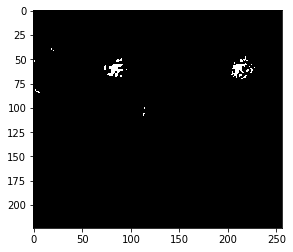

In [7]:
plt.imshow(np.c_[pred[0,:,:]>0.5,mask[0,:,:]],cmap='gray')

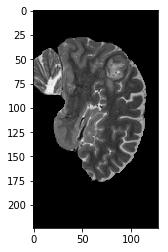

In [9]:
plt.imshow(X[0,3,:,:],cmap='gray')